In [1]:
%reload_ext autoreload
%autoreload
%matplotlib inline

In [2]:
from fastai.tabular import *

### RF Regression

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

#### 3 Month Price

In [11]:
path = Path('')

In [12]:
dfr = pd.read_csv(path/'Bitcoin - rf3.csv')

In [13]:
dfr.head()

,data,hash_rate,wallets,wallet_trans_perday,difficulty,wallet_trans_volume,avg_block_size,api_blockchain_size,miners_revenue,cost_per_trans,...,trans_per_block,unique_addresses_used,trans_excl_popular,transactions,num_transactions,trans_fees_usd,trans_fees,market_cap,total_bitcoins,price
0,2019-08-23,71377577.76,41414084,78222,1.018349e+13,9824.161496,1.241886,236316.0797,18220839.28,56.506962,...,2286.900709,609066,307053,447252821,322453,531089.8243,53.998799,1.794627e+11,17891262.5,7874.609167
1,2019-08-22,68846457.98,41378994,69410,1.018349e+13,9888.849592,1.188414,236140.9738,17818549.91,57.701063,...,2270.647059,599151,292684,446930368,308808,501755.4065,52.225873,1.819200e+11,17889500.0,8105.482500
2,2019-08-21,77452265.23,41350046,74982,1.018349e+13,11933.755210,1.077213,235979.3494,21054451.37,63.168913,...,2178.457516,558998,316466,446621560,333304,441939.2522,46.690090,1.922314e+11,17887800.0,8124.803333
3,2019-08-20,82514504.79,41327953,71864,1.018349e+13,7975.665038,0.938906,235814.5358,22051309.39,66.726508,...,2027.441718,517544,311978,446288256,330473,300332.6981,41.669480,1.896946e+11,17885887.5,8388.837500
4,2019-08-19,63784218.43,41310517,47844,1.001680e+13,3180.414384,0.949509,235661.4942,16515142.76,59.758445,...,2193.373016,407212,262209,445957783,276365,364170.2734,29.172343,1.841163e+11,17883850.0,8515.065000


In [14]:
labels = np.array(dfr['price'])

In [15]:
features= dfr.drop(['price','data'], axis = 1)

In [16]:
features.head()

,hash_rate,wallets,wallet_trans_perday,difficulty,wallet_trans_volume,avg_block_size,api_blockchain_size,miners_revenue,cost_per_trans,us_exchange_traded_vol,total_output_vol,trans_per_block,unique_addresses_used,trans_excl_popular,transactions,num_transactions,trans_fees_usd,trans_fees,market_cap,total_bitcoins
0,71377577.76,41414084,78222,1.018349e+13,9824.161496,1.241886,236316.0797,18220839.28,56.506962,1.989381e+08,1.172022e+07,2286.900709,609066,307053,447252821,322453,531089.8243,53.998799,1.794627e+11,17891262.5
1,68846457.98,41378994,69410,1.018349e+13,9888.849592,1.188414,236140.9738,17818549.91,57.701063,1.884298e+08,2.452867e+07,2270.647059,599151,292684,446930368,308808,501755.4065,52.225873,1.819200e+11,17889500.0
2,77452265.23,41350046,74982,1.018349e+13,11933.755210,1.077213,235979.3494,21054451.37,63.168913,1.575685e+08,9.748625e+06,2178.457516,558998,316466,446621560,333304,441939.2522,46.690090,1.922314e+11,17887800.0
3,82514504.79,41327953,71864,1.018349e+13,7975.665038,0.938906,235814.5358,22051309.39,66.726508,1.139026e+08,8.731949e+05,2027.441718,517544,311978,446288256,330473,300332.6981,41.669480,1.896946e+11,17885887.5
4,63784218.43,41310517,47844,1.001680e+13,3180.414384,0.949509,235661.4942,16515142.76,59.758445,8.916656e+07,9.661832e+05,2193.373016,407212,262209,445957783,276365,364170.2734,29.172343,1.841163e+11,17883850.0


In [17]:
feature_list = list(features.columns)

In [18]:
features = np.array(features)

In [19]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [20]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2470, 20)
Training Labels Shape: (2470,)
Testing Features Shape: (824, 20)
Testing Labels Shape: (824,)


In [21]:
rf = RandomForestRegressor(max_depth=110,n_estimators = 1000, max_features='sqrt', random_state = 42)
rf.fit(train_features, train_labels);
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 110.57 degrees.
Accuracy: 95.72 %.


In [22]:
#Test
dft = pd.read_csv(path/'Bitcoin - rftest.csv')
dft= dft.drop(['data','price'], axis = 1)
predictions = pd.DataFrame(rf.predict(dft))
predictions

,0
0,8916.792754
1,8862.676397
2,8833.934321
3,8905.974285
4,8784.920972
5,8753.041551
6,8768.038558
7,8879.212095
8,9010.370043
9,8790.488896


#### 6 Month Price

In [23]:
dfr6 = pd.read_csv(path/'Bitcoin - rf6.csv')
labels = np.array(dfr6['price'])
features= dfr6.drop(['price','data'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2403, 20)
Training Labels Shape: (2403,)
Testing Features Shape: (801, 20)
Testing Labels Shape: (801,)


In [24]:
rf6 = RandomForestRegressor(max_depth=110,n_estimators = 1000, max_features='sqrt', random_state = 42)
rf6.fit(train_features, train_labels);
predictions = rf6.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 103.12 degrees.
Accuracy: 95.17 %.


In [25]:
#Test 6 Month
dft = pd.read_csv(path/'Bitcoin - rftest.csv')
dft= dft.drop(['data','price'], axis = 1)
predictions = pd.DataFrame(rf6.predict(dft))
predictions

,0
0,8049.562604
1,7984.819137
2,7969.466942
3,7764.855264
4,7378.011741
5,7535.048116
6,7925.110121
7,7856.120368
8,8027.455393
9,7806.194519


#### 9 Month Price

In [26]:
dfr9 = pd.read_csv(path/'Bitcoin - rf9.csv')
labels = np.array(dfr9['price'])
features= dfr9.drop(['price','data'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2336, 20)
Training Labels Shape: (2336,)
Testing Features Shape: (779, 20)
Testing Labels Shape: (779,)


In [27]:
rf9 = RandomForestRegressor(max_depth=110,n_estimators = 1000, max_features='sqrt', random_state = 42)
rf9.fit(train_features, train_labels);
predictions = rf9.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 108.78 degrees.
Accuracy: 96.02 %.


In [28]:
#Test 9 Month
dft = pd.read_csv(path/'Bitcoin - rftest.csv')
dft= dft.drop(['data','price'], axis = 1)
predictions = pd.DataFrame(rf9.predict(dft))
predictions

,0
0,8824.330680
1,8808.559565
2,8840.740521
3,8819.459078
4,8926.159509
5,8907.534229
6,8822.064030
7,8779.326638
8,8819.842390
9,8807.475088


#### 12 Month Price

In [29]:
dfr12 = pd.read_csv(path/'Bitcoin - rf12.csv')
labels = np.array(dfr12['price'])
features= dfr12.drop(['price','date'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2265, 20)
Training Labels Shape: (2265,)
Testing Features Shape: (755, 20)
Testing Labels Shape: (755,)


In [30]:
rf12 = RandomForestRegressor(max_depth=110,n_estimators = 1000, max_features='sqrt', random_state = 42)
rf12.fit(train_features, train_labels);
predictions = rf12.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 105.9 degrees.
Accuracy: 95.85 %.


In [31]:
#Test 12 Month
dft = pd.read_csv(path/'Bitcoin - rftest.csv')
dft= dft.drop(['data','price'], axis = 1)
predictions = pd.DataFrame(rf12.predict(dft))
predictions

,0
0,8734.946081
1,8731.354046
2,8578.820705
3,8751.535518
4,8872.000674
5,8755.528631
6,8684.120996
7,8665.084718
8,8501.641018
9,8708.817248


### Interpretation

In [57]:
fi = rf.feature_importances_

In [58]:
pd.DataFrame({'Variable':feature_list,
              'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
14,transactions,0.155024
19,total_bitcoins,0.151407
1,wallets,0.143785
6,api_blockchain_size,0.120955
18,market_cap,0.091427
3,difficulty,0.082158
0,hash_rate,0.059016
7,miners_revenue,0.056651
16,trans_fees_usd,0.040071
9,us_exchange_traded_vol,0.026475


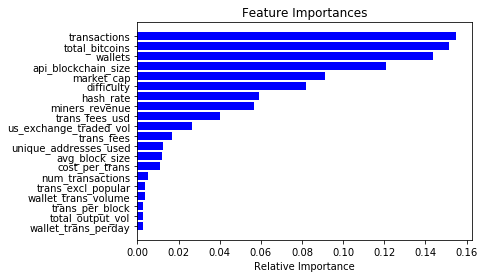

In [63]:
features=feature_list
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Fine Tuning

In [157]:
from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 110,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [158]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [159]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)